 Exploratory data analysis popularly known as EDA is a process of performing some initial investigations on the dataset to discover the structure and the content of the given dataset. It is often known as Data Profiling. It is an unavoidable step in the entire journey of data analysis right from the business understanding part to the deployment of the models created.

Introducing the Dataset

In this phase we are going to check the potabilty of water. we will be using the waterQuality1 dataset which can be downloaded from "https://www.kaggle.com/datasets/mssmartypants/water-quality".This is a set of data created from imaginary data of water quality in an urban environment.

Importing the Python Libraries

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt 
from sklearn import decomposition,preprocessing
import sklearn as sk

%matplotlib inline


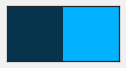

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

# Red Data

In [3]:
df=pd.read_csv('waterQuality1.csv')

# Initial Analysis

### Display the FIRST 5 Observations

In [4]:
df.head()

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_safe  
0    6.78      0.08    0.34     0.02        1  
1    3.21      0.08    0.27     0.05        1  
2    7.07      0.07    0.44     0.01        0  
3    1.72      0.02    0.45     0.05        1  
4    2.41      0.02    0.06     0.02        1  

[5 rows x 21 columns]

### Display the LAST 5 Observations

In [5]:
df.tail()

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
7994       0.05    7.78     0.00    1.95     0.04        0.10      0.03   
7995       0.05   24.22     0.02    0.59     0.01        0.45      0.02   
7996       0.09    6.85     0.00    0.61     0.03        0.05      0.05   
7997       0.01      10     0.01    2.00     0.00        2.00      0.00   
7998       0.04    6.85     0.01    0.70     0.03        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
7994    0.03      1.37       0.0  ...  0.197     14.29       1.0    0.005   
7995    0.02      1.48       0.0  ...  0.031     10.27       1.0    0.001   
7996    0.02      0.91       0.0  ...  0.182     15.92       1.0    0.000   
7997    0.09      0.00       0.0  ...  0.000      0.00       0.0    0.000   
7998    0.03      1.00       0.0  ...  0.182     15.92       1.0    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[5 rows x 21 columns]

### Display the Number of Variables & Number of Observations

In [6]:
df.shape

(7999, 21)

### Count the Number of Non-Missing Values for each Variable

In [7]:
df.count()

aluminium      7999
ammonia        7999
arsenic        7999
barium         7999
cadmium        7999
chloramine     7999
chromium       7999
copper         7999
flouride       7999
bacteria       7999
viruses        7999
lead           7999
nitrates       7999
nitrites       7999
mercury        7999
perchlorate    7999
radium         7999
selenium       7999
silver         7999
uranium        7999
is_safe        7999
dtype: int64

### Descriptive Statistics

In [8]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

# is_safe is 0 - means not good for Human

In [9]:

df[df['is_safe']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

c:\Users\Mohamed\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\Mohamed\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


### Datatype of the features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Handling Duplicates

This involves 2 steps: Detecting duplicates and Removing duplicates.


To check for the duplicates in our data

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7994    False
7995    False
7996    False
7997    False
7998    False
Length: 7999, dtype: bool

Except Target feature, other features are float and continueous value. we can convert the Portability into Categoring feature

In [12]:
df['is_safe']=df['is_safe'].astype('category')

Handling Outliers

Detecting Outliers


<AxesSubplot:>

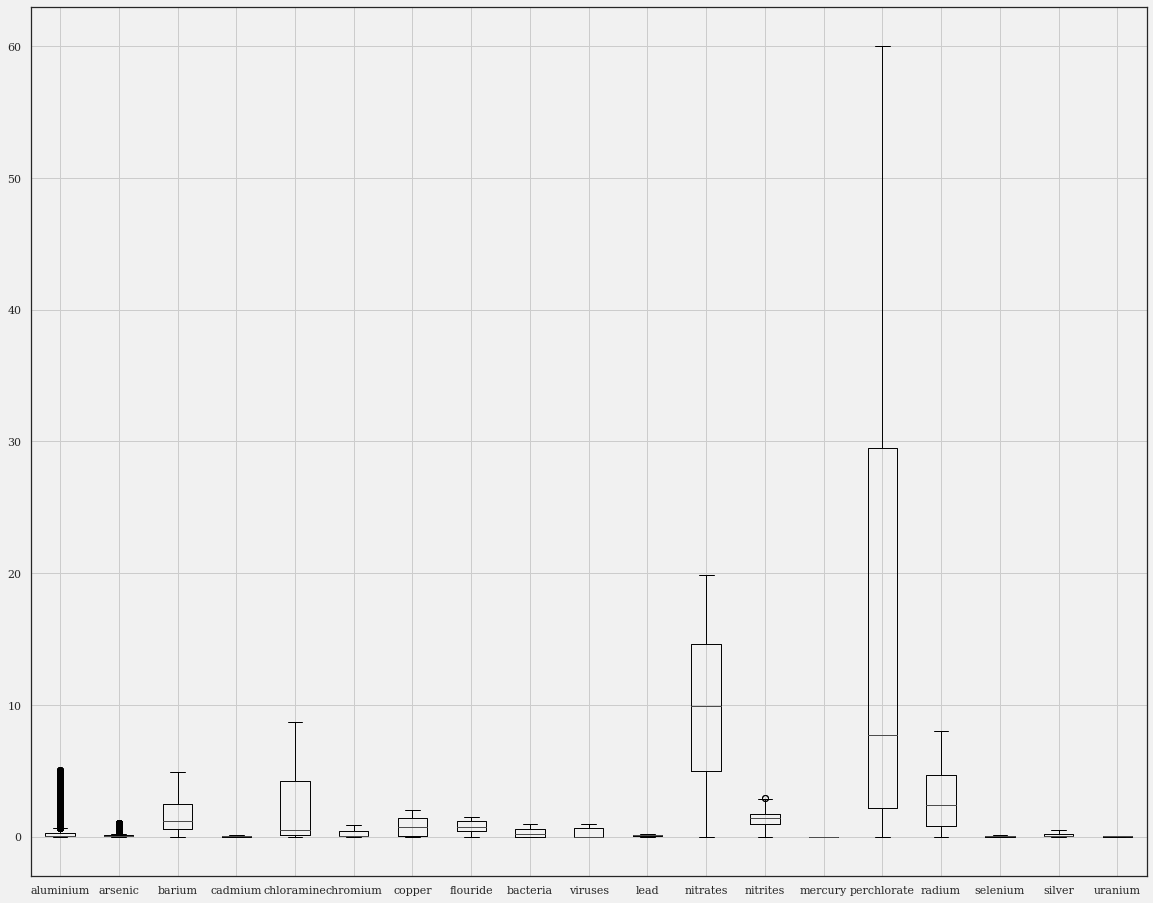

In [13]:
df.boxplot(figsize=(20, 16))

no need to take off the outliers

Handling outliers

IQR Method



Standard Deviation Method


Let’s consider the Purchase variable. Now we will be determining if there are any outliers in our data set using the IQR(Interquartile range) Method. What is this method about? You will get to know about it as we go along the process so let’s start. Finding the minimum(p0), maximum(p100), first quartile(q1), second quartile(q2), the third quartile(q3), and the iqr(interquartile range) of the values in the Purchase variable.

## Taking care of the missing values

Detecting  missing values

In [14]:
df= df.replace('#NUM!', np.NaN, regex=True)
df.isna().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

Percentage of missing values

In [15]:
df.isna().sum()/df.shape[0]

aluminium      0.000000
ammonia        0.000375
arsenic        0.000000
barium         0.000000
cadmium        0.000000
chloramine     0.000000
chromium       0.000000
copper         0.000000
flouride       0.000000
bacteria       0.000000
viruses        0.000000
lead           0.000000
nitrates       0.000000
nitrites       0.000000
mercury        0.000000
perchlorate    0.000000
radium         0.000000
selenium       0.000000
silver         0.000000
uranium        0.000000
is_safe        0.000375
dtype: float64

Deleting missing values

In [16]:
df = df.dropna()

check

In [17]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

# -----------------------------

### correlation 

In [18]:
df.select_dtypes(['float64' , 'int64']).corr()

aluminium   arsenic    barium   cadmium  chloramine  chromium  \
aluminium     1.000000  0.225725  0.294091 -0.099902    0.369221  0.353134   
arsenic       0.225725  1.000000  0.362925  0.334782    0.356509  0.312421   
barium        0.294091  0.362925  1.000000 -0.037901    0.446869  0.415937   
cadmium      -0.099902  0.334782 -0.037901  1.000000   -0.144366 -0.157716   
chloramine    0.369221  0.356509  0.446869 -0.144366    1.000000  0.555846   
chromium      0.353134  0.312421  0.415937 -0.157716    0.555846  1.000000   
copper        0.168569 -0.036488  0.065277 -0.109252    0.118975  0.113003   
flouride     -0.009877  0.003731 -0.018637  0.005005    0.004254 -0.002424   
bacteria     -0.078324  0.035642  0.101304 -0.092133    0.154443  0.141937   
viruses      -0.071040  0.011596 -0.002429  0.021255    0.003432  0.002193   
lead          0.020957 -0.087669 -0.042829 -0.035313   -0.030241 -0.050254   
nitrates     -0.003851  0.027533 -0.011423  0.020232   -0.001619 -0.012843   
nitrites      0.237439  0.305113  0.312783 -0.015829    0.379916  0.335940   
mercury      -0.003129 -0.015288  0.006165 -0.016169   -0.021198 -0.022541   
perchlorate   0.362986  0.332228  0.462207 -0.149269    0.588683  0.524432   
radium        0.243396  0.218328  0.286890 -0.098936    0.389119  0.315484   
selenium     -0.003651 -0.006993  0.035222  0.009933    0.011435  0.030598   
silver        0.334923  0.307794  0.431542 -0.155441    0.522372  0.510705   
uranium       0.014723  0.001469 -0.002541 -0.005911   -0.007648 -0.005472   

               copper  flouride  bacteria   viruses      lead  nitrates  \
aluminium    0.168569 -0.009877 -0.078324 -0.071040  0.020957 -0.003851   
arsenic     -0.036488  0.003731  0.035642  0.011596 -0.087669  0.027533   
barium       0.065277 -0.018637  0.101304 -0.002429 -0.042829 -0.011423   
cadmium     -0.109252  0.005005 -0.092133  0.021255 -0.035313  0.020232   
chloramine   0.118975  0.004254  0.154443  0.003432 -0.030241 -0.001619   
chromium     0.113003 -0.002424  0.141937  0.002193 -0.050254 -0.012843   
copper       1.000000  0.011647  0.149271  0.006183  0.121762  0.002259   
flouride     0.011647  1.000000  0.013984  0.018261  0.012146 -0.008245   
bacteria     0.149271  0.013984  1.000000  0.618535 -0.027179 -0.033993   
viruses      0.006183  0.018261  0.618535  1.000000  0.017886 -0.044621   
lead         0.121762  0.012146 -0.027179  0.017886  1.000000  0.035095   
nitrates     0.002259 -0.008245 -0.033993 -0.044621  0.035095  1.000000   
nitrites     0.162092 -0.016591  0.246463 -0.091364 -0.052656  0.016898   
mercury      0.017785 -0.004263 -0.004406  0.011728 -0.008073 -0.020429   
perchlorate  0.104527 -0.016352  0.147526  0.002965 -0.027426 -0.014091   
radium       0.026534  0.007683  0.099080 -0.019955 -0.048623 -0.021406   
selenium    -0.003356  0.022726 -0.006779 -0.035013  0.031694  0.043180   
silver       0.089241  0.014446  0.148199  0.011680 -0.057207  0.005149   
uranium      0.006802  0.016849  0.045077  0.058473 -0.009372  0.000795   

             nitrites   mercury  perchlorate    radium  selenium    silver  \
aluminium    0.237439 -0.003129     0.362986  0.243396 -0.003651  0.334923   
arsenic      0.305113 -0.015288     0.332228  0.218328 -0.006993  0.307794   
barium       0.312783  0.006165     0.462207  0.286890  0.035222  0.431542   
cadmium     -0.015829 -0.016169    -0.149269 -0.098936  0.009933 -0.155441   
chloramine   0.379916 -0.021198     0.588683  0.389119  0.011435  0.522372   
chromium     0.335940 -0.022541     0.524432  0.315484  0.030598  0.510705   
copper       0.162092  0.017785     0.104527  0.026534 -0.003356  0.089241   
flouride    -0.016591 -0.004263    -0.016352  0.007683  0.022726  0.014446   
bacteria     0.246463 -0.004406     0.147526  0.099080 -0.006779  0.148199   
viruses     -0.091364  0.011728     0.002965 -0.019955 -0.035013  0.011680   
lead        -0.052656 -0.008073    -0.027426 -0.048623  0.031694 -0.057207   
nitrates     0.

# Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lets check the Target features first

Text(0.8, 1500, 'Safe for Human consumption')

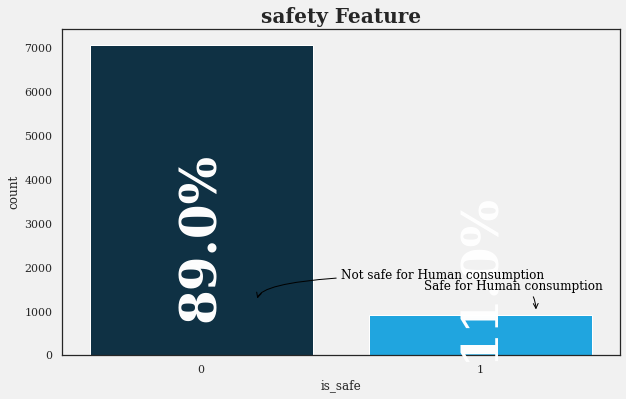

In [21]:
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()
fig = plt.figure(figsize=(10,6))
ax=sns.countplot(data=df, x='is_safe')
for i in ax.patches:
    ax.text(x=i.get_x()+i.get_width()/2, y=i.get_height()/7, s=f"{np.round(i.get_height()/len(df)*100,0)}%", ha='center', size=50, weight='bold', rotation=90, color='white')
plt.title("safety Feature", size=20, weight='bold')
plt.annotate(text="Not safe for Human consumption", xytext=(0.5,1750),xy=(0.2,1250), arrowprops =dict(arrowstyle="->", color='black', connectionstyle="angle3,angleA=0,angleB=90"), color='black')
plt.annotate(text="Safe for Human consumption", xytext=(0.8,1500),xy=(1.2,1000), arrowprops =dict(arrowstyle="->", color='black',  connectionstyle="angle3,angleA=0,angleB=90"), color='black')


There is imbalance in the Target variable. which should be considered for modeling

In [22]:
features=df.drop(["is_safe"],axis =1)
target=df["is_safe"]

In [23]:
train, test= sk.model_selection.train_test_split(df, test_size = 0.2,random_state=442)

<AxesSubplot:ylabel='is_safe'>

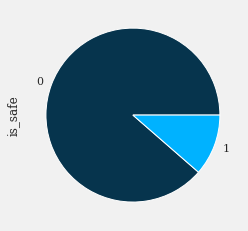

In [24]:
df.is_safe.value_counts().plot(kind ='pie')

In [25]:
from imblearn.over_sampling import SMOTE,ADASYN
oversample = ADASYN()
x_train, y_train=  oversample.fit_resample(train.drop(["is_safe"],axis=1),train["is_safe"])

0    5672
1    5544
Name: is_safe, dtype: int64


<AxesSubplot:ylabel='is_safe'>

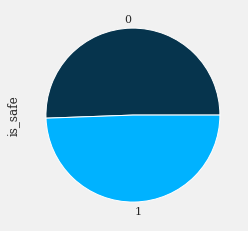

In [26]:
print(y_train.value_counts())
y_train.value_counts().plot(kind ='pie')

<Figure size 1440x1440 with 0 Axes>

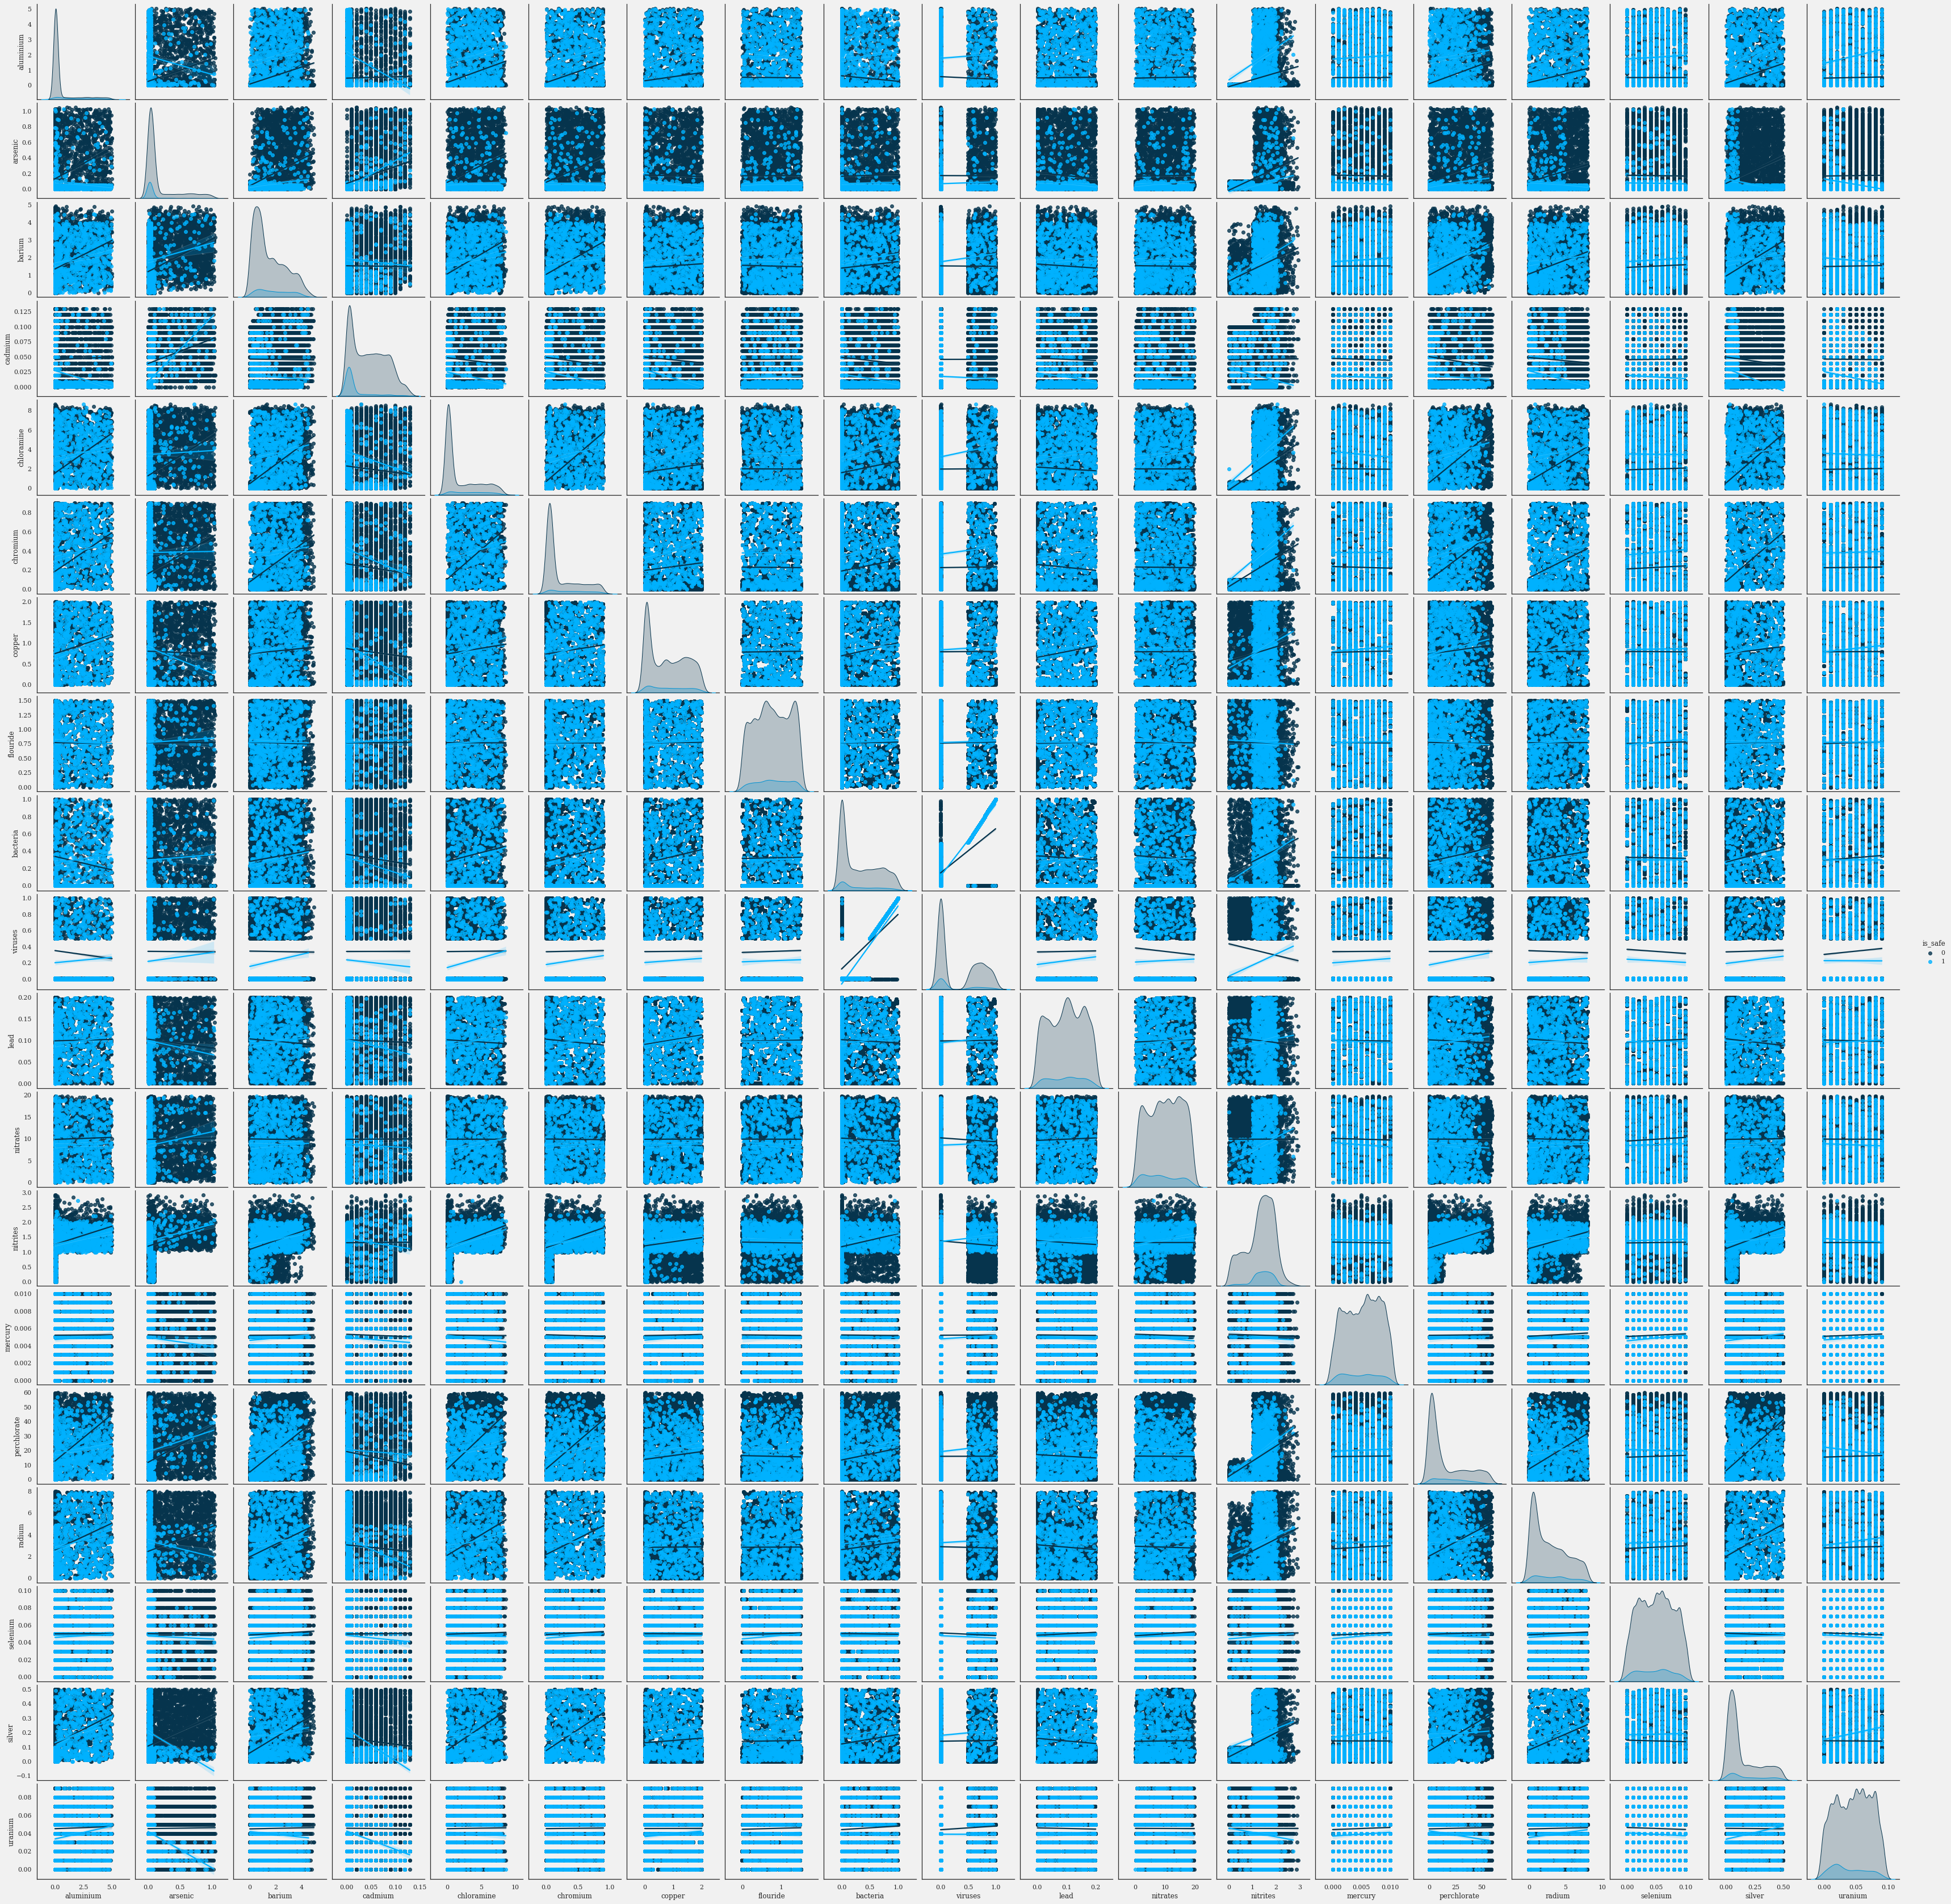

In [27]:
fig=plt.figure(figsize=(20,20))
sns.pairplot(df, hue='is_safe', kind='reg')

<AxesSubplot:>

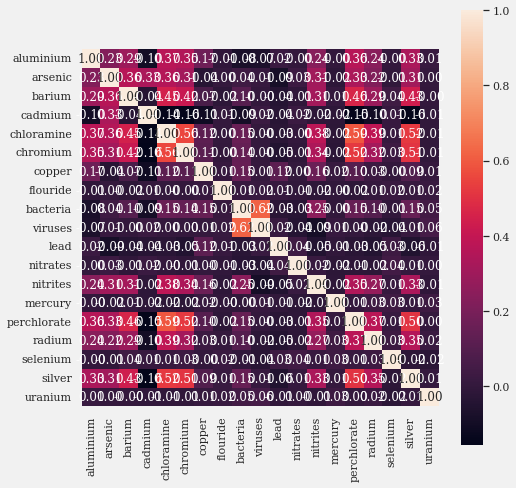

In [28]:
fig=plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True)

In [29]:
x_test = test.drop(["is_safe"],axis =1)
y_test = test["is_safe"]

In [30]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier ,BaggingClassifier, GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,matthews_corrcoef
from sklearn import metrics,model_selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score,StratifiedKFold

In [113]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler,RobustScaler,PowerTransformer,QuantileTransformer,MaxAbsScaler
sc = MinMaxScaler()
features1= x_train.columns
features2= x_test.columns
x_train[features1] = sc.fit_transform(x_train[features1])
x_test[features2] = sc.fit_transform(x_test[features2])

In [592]:
para_knn = {'n_neighbors':np.arange(1, 30)}  #parameters of knn
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5)
grid_knn.fit(x_train, y_train)
print("Best parameters for KNN:", grid_knn.best_params_)

Best parameters for KNN: {'n_neighbors': 1}


              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1412
           1       0.25      0.36      0.29       188

    accuracy                           0.80      1600
   macro avg       0.58      0.61      0.59      1600
weighted avg       0.83      0.80      0.81      1600

mcc:0.1844677048435036


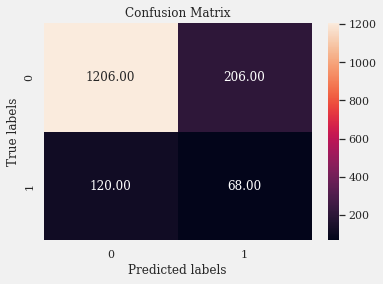

In [31]:
Knn_model = KNeighborsClassifier(n_neighbors=1)
Knn_model.fit(x_train, y_train)
acc = Knn_model.score(x_test, y_test)
y_pred = Knn_model.predict(x_test)
print(classification_report(y_test, y_pred))
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1412
           1       0.25      0.36      0.29       188

    accuracy                           0.80      1600
   macro avg       0.58      0.61      0.59      1600
weighted avg       0.83      0.80      0.81      1600

mcc:0.1844677048435036


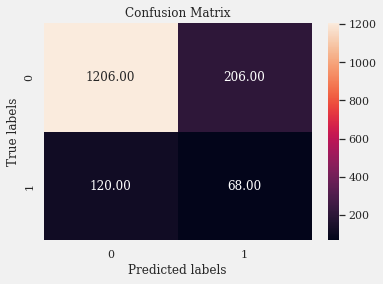

In [32]:
Logit_model = LogisticRegression(solver='liblinear')
Logit_model.fit(x_train, y_train)
acc = Logit_model.score(x_test, y_test)
print(classification_report(y_test, y_pred))
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [642]:
rf = RandomForestClassifier()
params_rf = {'n_estimators':[100,150,200,250,300,350,400,450,500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)
grid_rf.fit(x_train,y_train)
print("Best parameters for Random Forest:",grid_rf.best_params_)

Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 400}


In [ ]:
model = RandomForestClassifier(n_estimators=400, min_samples_leaf=2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [597]:
dt = DecisionTreeClassifier()
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5)
grid_dt.fit(x_train,y_train)
print("Best parameters for Decision Tree:", grid_dt.best_params_)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 1}


mcc:0.7638063648873077
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1412
           1       0.71      0.89      0.79       188

    accuracy                           0.94      1600
   macro avg       0.85      0.92      0.88      1600
weighted avg       0.95      0.94      0.95      1600



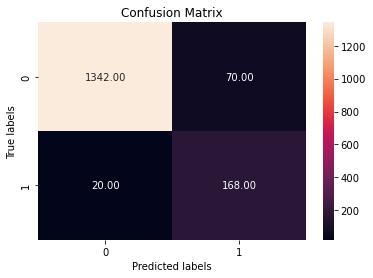

In [122]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=1, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [599]:
ada = AdaBoostClassifier()
params_ada = {'n_estimators': [50,80,100,200,250,400,500,600,700], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)
grid_ada.fit(x_train, y_train)
print("Best parameters for AdaBoost:", grid_ada.best_params_)

Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 500}


mcc:0.5706648417564748
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1412
           1       0.59      0.65      0.62       188

    accuracy                           0.91      1600
   macro avg       0.77      0.80      0.78      1600
weighted avg       0.91      0.91      0.91      1600



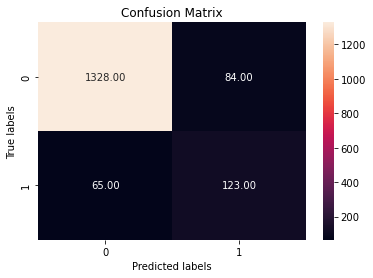

In [123]:
model = AdaBoostClassifier(n_estimators= 500, learning_rate= 0.5 )
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [601]:
bc = BaggingClassifier()
params_bc = {'n_estimators': [50,100,250,400,500,600]}
grid_bc =  GridSearchCV(bc, param_grid=params_bc, cv=5)
grid_bc.fit(x_train, y_train)
print("Best parameters for BaggingClassifier:", grid_bc.best_params_)

Best parameters for AdaBoost: {'n_estimators': 600}


mcc:0.8383520419674245
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1412
           1       0.79      0.93      0.86       188

    accuracy                           0.96      1600
   macro avg       0.89      0.95      0.92      1600
weighted avg       0.97      0.96      0.96      1600



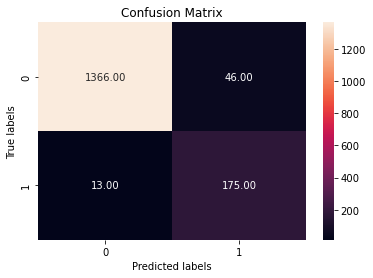

In [124]:
model = BaggingClassifier(n_estimators=600)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [603]:
gbc = GradientBoostingClassifier()
params_gbc = {'n_estimators': [50,100,250,400,500,600]}
grid_gbc =  GridSearchCV(gbc, param_grid=params_ada, cv=5)
grid_gbc.fit(x_train, y_train)
print("Best parameters for GradientBoostingClassifier:", grid_gbc.best_params_)

Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 100}


mcc:0.7670848087794159
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1412
           1       0.77      0.82      0.79       188

    accuracy                           0.95      1600
   macro avg       0.87      0.90      0.88      1600
weighted avg       0.95      0.95      0.95      1600



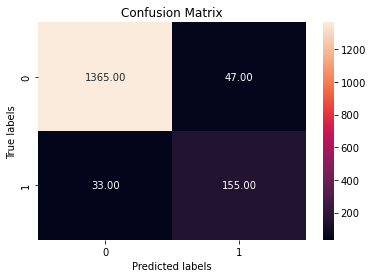

In [125]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [85]:
xgb =XGBClassifier(verbosity = 0,silent=True)
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)
rs_xgb.fit(x_train, y_train)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

c:\Users\Mohamed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\Mohamed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


KeyboardInterrupt: 

c:\Users\Mohamed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


mcc:0.8362291836560434
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1412
           1       0.84      0.87      0.86       188

    accuracy                           0.97      1600
   macro avg       0.91      0.92      0.92      1600
weighted avg       0.97      0.97      0.97      1600



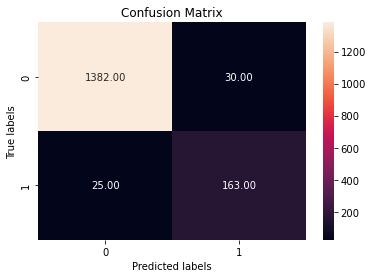

In [126]:
model = XGBClassifier(n_estimators= 100, learning_rate= 0.2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

c:\Users\Mohamed\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


mcc:0.8289278166166839
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1412
           1       0.82      0.88      0.85       188

    accuracy                           0.96      1600
   macro avg       0.90      0.93      0.91      1600
weighted avg       0.96      0.96      0.96      1600



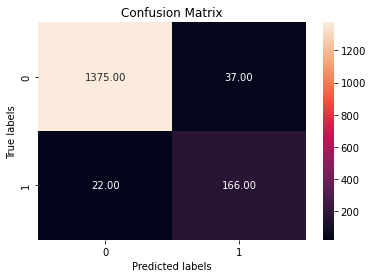

In [127]:
xgb1 = XGBClassifier(n_estimators= 100, learning_rate= 0.2)
bc1 = BaggingClassifier(n_estimators=600)
gbc1 = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.2)

evc = VotingClassifier(estimators=[('xgb1', xgb1), ('gbc1', gbc1), ('bc1', bc1)],voting='hard')
evc.fit(x_train,y_train)
y_pred = evc.predict(x_test)
print('mcc:'+str(sklearn.metrics.matthews_corrcoef(y_test, y_pred)))
print(classification_report(y_test, y_pred))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.2f')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [27]:
import pickle
pickle.dump(evc,open('water.pkl','wb'))
pickle.dump(sc,open('scaler.pkl','wb'))